<a href="https://colab.research.google.com/github/JessicaFaulk/Machine-Learning/blob/main/Regression_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install dmba
!pip install imblearn
!pip install tabulate

In [27]:
# Importing Data
import pandas as pd
# Splitting Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Regression Summary
from dmba import regressionSummary
# Linear Regression
from sklearn.linear_model import LinearRegression as skLNR
# Regression Tree
from sklearn.tree import DecisionTreeRegressor as skDTR

# Plot Trees
from dmba import plotDecisionTree
# Google Colab Mounting
from google.colab import drive

In [28]:
#Import Data Needed: Boston House
house = pd.read_csv("https://raw.githubusercontent.com/JessicaFaulk/Machine-Learning/refs/heads/main/Regression%20Tree/BostonHousing.csv")


# review the dataset
print(house.info())
print('\n'*2)

#remove the column CAT. MED
print('Drop CAT. MEDV')
house = house.drop(columns = ['CAT. MEDV'])
print('\n'*2)

#review the value counts of CHAS to see what the categories are labeled as
## CHAS is categorical but already binary so we don't need to run get dummies
print('CHAS value counts')
print(house.CHAS.value_counts())
house[["CHAS"]] = house[["CHAS"]].astype('category')
print('\n')
print(house.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB
None



Drop CAT. MEDV



CHAS value counts
CHAS
0    471
1     35
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 # 

<Axes: ylabel='MEDV'>

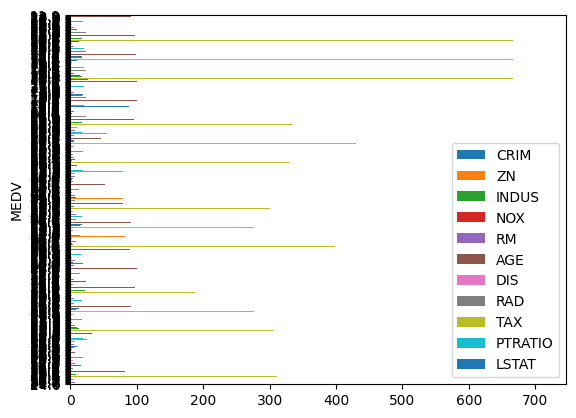

In [29]:
# Graphic Review of Data
house.plot.barh(x = 'MEDV')

In [30]:
#split into predictor and response variables x and y
responsevariable = ['MEDV']
X = house.drop(columns = responsevariable)
y = house.MEDV
print(X.head())

print('\n'*2)

print(y.head())


# split the dataset into testing and training sets
print("\n" + "-"*30 + "\nSplitting Data into Train and Test Sets\n" + "-"*30 + "\n")
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print("\n" + "-"*30 + "\nx_train Information:\n" + "-"*30)
display(x_train.info())

print("\n" + "-"*30 + "\nx_test Information:\n" + "-"*30)
display(x_test.info())

print("\n" + "-"*30 + "\ny_train Information:\n" + "-"*30)
display(y_train.info())

print("\n" + "-"*30 + "\ny_test Information:\n" + "-"*30)
display(y_test.info())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  
0   4.98  
1   9.14  
2   4.03  
3   2.94  
4   5.33  



0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

------------------------------
Splitting Data into Train and Test Sets
------------------------------


------------------------------
x_train Information:
------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 13 to 37
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM    

None


------------------------------
x_test Information:
------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 307 to 23
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     152 non-null    float64 
 1   ZN       152 non-null    float64 
 2   INDUS    152 non-null    float64 
 3   CHAS     152 non-null    category
 4   NOX      152 non-null    float64 
 5   RM       152 non-null    float64 
 6   AGE      152 non-null    float64 
 7   DIS      152 non-null    float64 
 8   RAD      152 non-null    int64   
 9   TAX      152 non-null    int64   
 10  PTRATIO  152 non-null    float64 
 11  LSTAT    152 non-null    float64 
dtypes: category(1), float64(9), int64(2)
memory usage: 14.5 KB


None


------------------------------
y_train Information:
------------------------------
<class 'pandas.core.series.Series'>
Index: 354 entries, 13 to 37
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
354 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


None


------------------------------
y_test Information:
------------------------------
<class 'pandas.core.series.Series'>
Index: 152 entries, 307 to 23
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
152 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


None

In [31]:
import statsmodels.formula.api as smf
from tabulate import tabulate # Import the tabulate function

ols_data = pd.concat([x_train, y_train], axis = 1)

# define OLS model
lm_model = smf.ols(formula = "MEDV ~ CRIM + ZN + INDUS + NOX +\
RM + AGE + DIS + RAD + TAX + PTRATIO + LSTAT + CHAS",
                   data = ols_data).fit()

# Print the model summary
print(lm_model.summary())


print('\n')
print('-'*10)
print('\n')

# Access coefficients and p-values
coefficients = lm_model.params  # Get the beta coefficients
p_values = lm_model.pvalues  # Get the p-values

# Create a list of lists to store the data for the table
table_data = [['Predictor', 'Beta Coefficient', 'P-value', 'Interpretation']]
for predictor, coef, p_value in zip(coefficients.index, coefficients.values, p_values.values):
    interpretation = ""  # Initialize an empty interpretation string

    # Add specific interpretations based on predictor and significance:
    if predictor == "Intercept":
        interpretation = "Intercept (usually not practically interpretable)"
    elif p_value < 0.05:  # Check for statistical significance
        if coef > 0:
            interpretation = f"A one-unit increase in {predictor} is associated with an increase of ${coef:.4f} in MEDV."
        else:
            interpretation = f"A one-unit increase in {predictor} is associated with a decrease of ${abs(coef):.4f} in MEDV."
    else:
        interpretation = f"Not statistically significant (p-value > 0.05)"

    table_data.append([predictor, f"{coef:.4f}", f"{p_value:.4f}", interpretation])

# Use tabulate to create the Markdown table
table_string = tabulate(table_data[1:], headers=table_data[0], tablefmt="pipe")

# Print the Markdown table
print(table_string)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     68.69
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           2.38e-83
Time:                        04:28:42   Log-Likelihood:                -1063.0
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     341   BIC:                             2202.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8852      6.107      8.168      0.0

In [32]:
def LinReg(xtrain,xtest,ytrain,ytest):
  """
  Run Linear Regression Model for x and y test and training data, intercept is set to false by default
  returns the Linear Model
  """
  from dmba import regressionSummary
  from sklearn.linear_model import LinearRegression
  LN = LinearRegression()
  LN.fit(xtrain,ytrain) # Fit model to training data
  train_preds = LN.predict(xtrain) # Predict y values for training data from x
  test_preds = LN.predict(xtest) # Predict y values for testing data from x


  residuals = pd.DataFrame({'actual': ytest, 'predicted': test_preds})
  residuals['residuals'] = residuals['actual'] - residuals['predicted']
  print("Linear Regression\n")

  print('Generate Residuals')
  print(residuals.head(10))
  print('\n'*2)

  print('')
  print('Testing Model Regression Summary for SKLearn Linear Regression')
  print(regressionSummary(ytest,test_preds)) # Regression summary for testing data
  print('\n'*2)
  return LN, residuals


# Run functions
lm1, resid1 = LinReg(x_train,x_test,y_train,y_test)

Linear Regression

Generate Residuals
     actual  predicted  residuals
307    28.2  32.401501  -4.201501
343    23.9  27.887341  -3.987341
47     16.6  17.737617  -1.137617
67     22.0  21.686439   0.313561
362    20.8  18.642772   2.157228
132    23.0  19.940947   3.059053
292    27.9  32.708550  -4.808550
31     14.5  17.945383  -3.445383
218    21.5  24.606120  -3.106120
90     22.6  26.825243  -4.225243




Testing Model Regression Summary for SKLearn Linear Regression

Regression statistics

                      Mean Error (ME) : -0.2199
       Root Mean Squared Error (RMSE) : 4.5697
            Mean Absolute Error (MAE) : 3.4398
          Mean Percentage Error (MPE) : -5.8113
Mean Absolute Percentage Error (MAPE) : 16.8368
None





Regression Tree

- regression trees are used for

In [33]:

def simple_tree(xtrain,xtest,ytrain,ytest, depth = None, min_impurity_decrease = None, min_samples_split = None ):


  # Regression Tree
  from sklearn.tree import DecisionTreeRegressor as skDTR

  # Plot Trees
  from dmba import plotDecisionTree


  print('Perform Simple Regression Tree')
  print('\n')
  model = skDTR(max_depth=depth,
      min_impurity_decrease=0.0)

  rt = model.fit(xtrain,ytrain)
  train_preds = model.predict(xtrain)
  test_preds = model.predict(xtest)

  resids = pd.DataFrame({'actual': ytest, 'predicted': test_preds})
  resids['residuals'] = resids['actual'] - resids['predicted']
  print(resids.head(10))

  print('--'*10)

  print(f'Testing Model Regression Summary for SKLearn Regression Tree  - Max depth = {depth}, min_impurity_decrease = {min_impurity_decrease}, min_samples_split = {min_samples_split}')
  print(regressionSummary(ytest,test_preds))

  #plot the tree
  display(plotDecisionTree(rt, feature_names = xtrain.columns))

  return rt, resids






Perform Simple Regression Tree


     actual  predicted  residuals
307    28.2       29.9       -1.7
343    23.9       24.5       -0.6
47     16.6       27.1      -10.5
67     22.0       20.9        1.1
362    20.8       16.1        4.7
132    23.0       19.2        3.8
292    27.9       31.5       -3.6
31     14.5       18.4       -3.9
218    21.5       21.4        0.1
90     22.6       21.6        1.0
--------------------
Testing Model Regression Summary for SKLearn Regression Tree  - Max depth = None, min_impurity_decrease = None, min_samples_split = None

Regression statistics

                      Mean Error (ME) : -0.0678
       Root Mean Squared Error (RMSE) : 4.3857
            Mean Absolute Error (MAE) : 2.9296
          Mean Percentage Error (MPE) : -2.9186
Mean Absolute Percentage Error (MAPE) : 14.8891
None


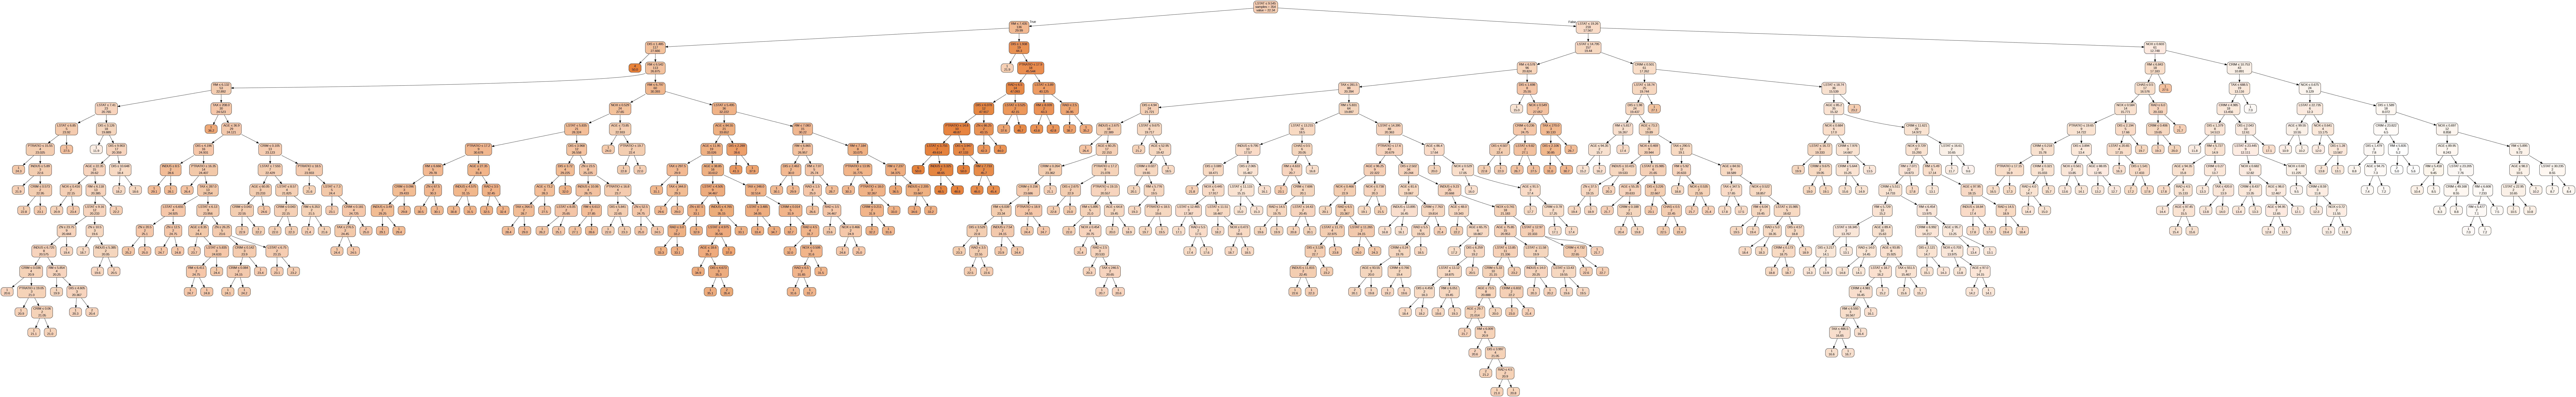

In [34]:
srt, resids = simple_tree(x_train,x_test,y_train,y_test)

In [35]:
def pruned_tree(x_train, x_test, y_train, y_test, parama):
  """
  Prunes a decision tree using GridSearchCV to find the best hyperparameters.

  Args:
    x_train: The training data for the predictor variables.
    x_test: The testing data for the predictor variables.
    y_train: The training data for the response variable.
    y_test: The testing data for the response variable.
    parama: A dictionary of hyperparameters to search over.

  Returns:
    A tuple containing the pruned decision tree model and a DataFrame of residuals.
  """
  from sklearn.model_selection import GridSearchCV
  from sklearn.tree import DecisionTreeRegressor
  from dmba import regressionSummary, plotDecisionTree
  import pandas as pd

  # Use GridSearchCV to find the best hyperparameters
  gsr = GridSearchCV(DecisionTreeRegressor(), parama, cv=5)
  gsr.fit(x_train, y_train)

  print("--"*10)
  print(f"GridSeachCV Results")
  print("--"*10)
  print(f"Score: {gsr.best_score_}")
  print(f"Best Parameters: {gsr.best_params_}")

  # Train a decision tree model with the best hyperparameters
  rt = DecisionTreeRegressor(**gsr.best_params_)
  rt.fit(x_train, y_train)

  # Make predictions on the testing data
  test_preds = rt.predict(x_test)
  print("--"*10)
  print("Calculate Residuals")
  print("--"*10)
  # Calculate residuals
  resids = pd.DataFrame({'actual': y_test, 'predicted': test_preds})
  resids['residuals'] = resids['actual'] - resids['predicted']
  print(resids.head())

  #print the regression summary
  print("--"*10)
  print("Regression Summary")
  print("--"*10)
  print(f'Testing Model Regression Summary for SKLearn Regression Tree - {gsr.best_params_}')
  print(regressionSummary(y_test, test_preds))

  # Plot the tree
  display(plotDecisionTree(rt, feature_names=x_train.columns))

  return rt, resids

--------------------
GridSeachCV Results
--------------------
Score: 0.7247108444589003
Best Parameters: {'max_depth': 25, 'min_impurity_decrease': 0, 'min_samples_split': 50}
--------------------
Calculate Residuals
--------------------
     actual  predicted  residuals
307    28.2  32.222222  -4.022222
343    23.9  27.650000  -3.750000
47     16.6  19.744000  -3.144000
67     22.0  20.765217   1.234783
362    20.8  18.500000   2.300000
--------------------
Regression Summary
--------------------
Testing Model Regression Summary for SKLearn Regression Tree - {'max_depth': 25, 'min_impurity_decrease': 0, 'min_samples_split': 50}

Regression statistics

                      Mean Error (ME) : -0.0210
       Root Mean Squared Error (RMSE) : 3.2953
            Mean Absolute Error (MAE) : 2.6327
          Mean Percentage Error (MPE) : -3.5305
Mean Absolute Percentage Error (MAPE) : 13.5034
None


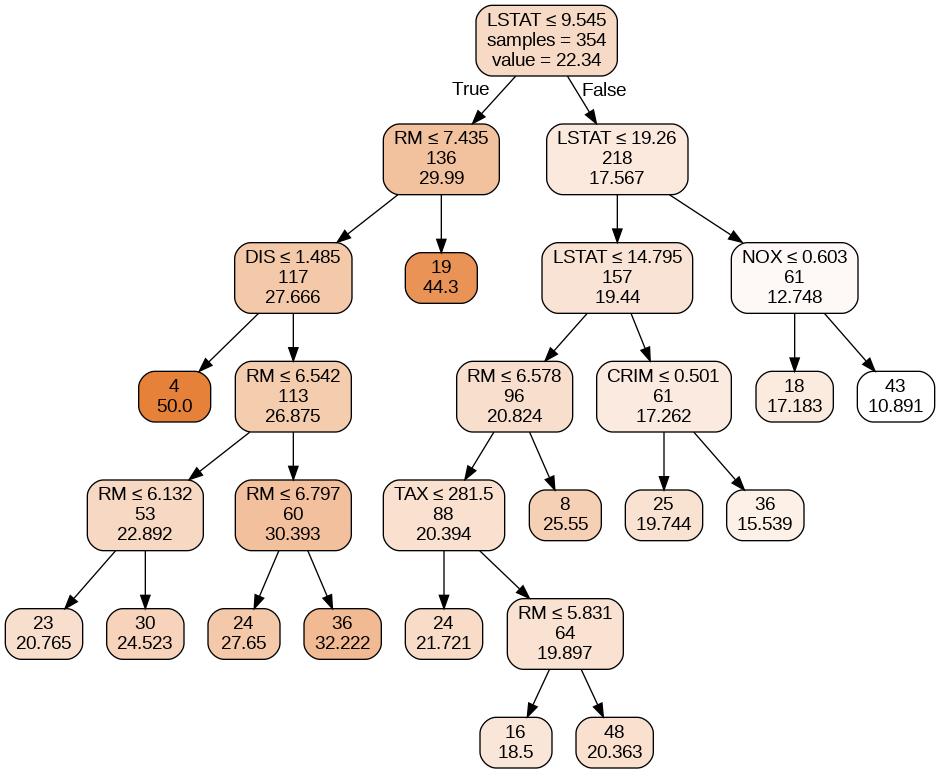

In [36]:
parama = {'max_depth': [5, 10, 15, 20, 25],
          'min_samples_split': [50, 100, 150, 200, 250, 300],
          'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]}

prt, resids = pruned_tree(x_train, x_test, y_train, y_test, parama)

Task B

In [37]:
#Import Advertisting Data set



advert = pd.read_csv("https://raw.githubusercontent.com/JessicaFaulk/Machine-Learning/refs/heads/main/Regression%20Tree/advertising.csv")
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [38]:
#split into predictor and response variables x and y
responsevariable = ['Sales']




X = advert.drop(columns = responsevariable)
y = advert.Sales
print(X.head())

print('\n'*2)

print(y.head())

# split the dataset into testing and training sets
print("\n" + "-"*30 + "\nSplitting Data into Train and Test Sets\n" + "-"*30 + "\n")
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print("\n" + "-"*30 + "\nx_train Information:\n" + "-"*30)
display(x_train.info())

print("\n" + "-"*30 + "\nx_test Information:\n" + "-"*30)
display(x_test.info())

print("\n" + "-"*30 + "\ny_train Information:\n" + "-"*30)
display(y_train.info())

print("\n" + "-"*30 + "\ny_test Information:\n" + "-"*30)
display(y_test.info())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4



0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

------------------------------
Splitting Data into Train and Test Sets
------------------------------


------------------------------
x_train Information:
------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 116 to 37
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         140 non-null    float64
 1   Radio      140 non-null    float64
 2   Newspaper  140 non-null    float64
dtypes: float64(3)
memory usage: 4.4 KB


None


------------------------------
x_test Information:
------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 58 to 138
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         60 non-null     float64
 1   Radio      60 non-null     float64
 2   Newspaper  60 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


None


------------------------------
y_train Information:
------------------------------
<class 'pandas.core.series.Series'>
Index: 140 entries, 116 to 37
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
140 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


None


------------------------------
y_test Information:
------------------------------
<class 'pandas.core.series.Series'>
Index: 60 entries, 58 to 138
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


None

In [39]:
# Run functions


print(' Linear Regression Model for Advertising Data')
print('\n')
lm2, resid2 = LinReg(x_train,x_test,y_train,y_test)

 Linear Regression Model for Advertising Data


Linear Regression

Generate Residuals
     actual  predicted  residuals
58     23.8  21.288161   2.511839
40     16.6  18.042132  -1.442132
34     11.9  10.059590   1.840410
102    19.8  21.082241  -1.282241
184    17.6  20.764760  -3.164760
198    25.5  24.471874   1.028126
95     16.9  16.806436   0.093564
4      17.9  15.628857   2.271143
29     10.5  10.124799   0.375201
168    17.1  18.846019  -1.746019




Testing Model Regression Summary for SKLearn Linear Regression

Regression statistics

                      Mean Error (ME) : 0.1315
       Root Mean Squared Error (RMSE) : 1.5397
            Mean Absolute Error (MAE) : 1.1947
          Mean Percentage Error (MPE) : -0.1684
Mean Absolute Percentage Error (MAPE) : 7.6951
None





Perform Simple Regression Tree for Advertising Data


Perform Simple Regression Tree


     actual  predicted  residuals
58     23.8       22.4        1.4
40     16.6       18.0       -1.4
34     11.9       13.7       -1.8
102    19.8       16.1        3.7
184    17.6       20.7       -3.1
198    25.5       26.2       -0.7
95     16.9       16.0        0.9
4      17.9       17.1        0.8
29     10.5       10.6       -0.1
168    17.1       19.4       -2.3
--------------------
Testing Model Regression Summary for SKLearn Regression Tree  - Max depth = None, min_impurity_decrease = None, min_samples_split = None

Regression statistics

                      Mean Error (ME) : 0.1333
       Root Mean Squared Error (RMSE) : 1.5700
            Mean Absolute Error (MAE) : 1.1567
          Mean Percentage Error (MPE) : 0.7464
Mean Absolute Percentage Error (MAPE) : 8.1274
None


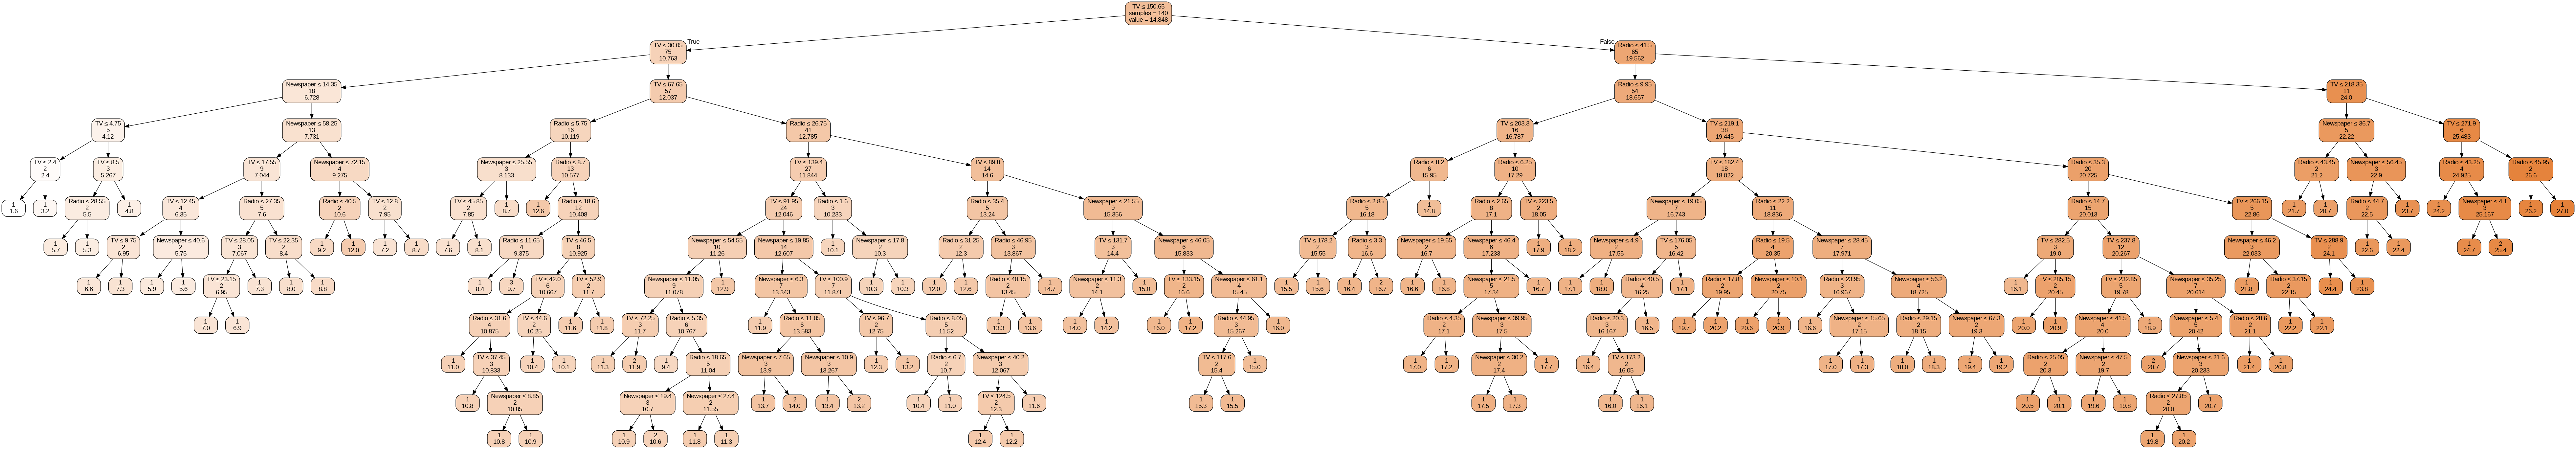

In [40]:
# Perform Simple Regression Tree for Advertising Data

print('Perform Simple Regression Tree for Advertising Data')
print('\n')

srt1, resids1 = simple_tree(x_train,x_test,y_train,y_test)

Perform Pruned Regression Tree for Advertising Data


--------------------
GridSeachCV Results
--------------------
Score: 0.7443735558080703
Best Parameters: {'max_depth': 5, 'min_impurity_decrease': 0.0005, 'min_samples_split': 50}
--------------------
Calculate Residuals
--------------------
     actual  predicted  residuals
58     23.8  24.000000  -0.200000
40     16.6  19.444737  -2.844737
34     11.9  12.785366  -0.885366
102    19.8  19.444737   0.355263
184    17.6  19.444737  -1.844737
--------------------
Regression Summary
--------------------
Testing Model Regression Summary for SKLearn Regression Tree - {'max_depth': 5, 'min_impurity_decrease': 0.0005, 'min_samples_split': 50}

Regression statistics

                      Mean Error (ME) : -0.0939
       Root Mean Squared Error (RMSE) : 1.8288
            Mean Absolute Error (MAE) : 1.4737
          Mean Percentage Error (MPE) : -1.2141
Mean Absolute Percentage Error (MAPE) : 9.9964
None


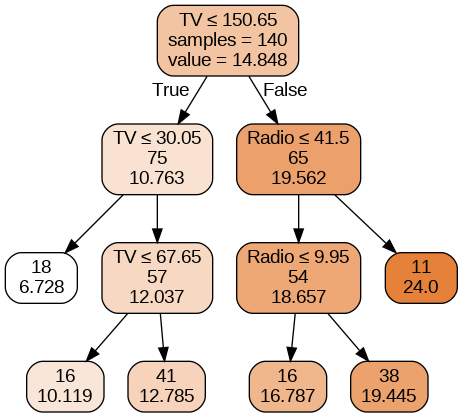

In [41]:

print('Perform Pruned Regression Tree for Advertising Data')
print('\n')


parama = {'max_depth': [5, 10, 15, 20, 25],
          'min_samples_split': [50, 100, 150, 200, 250, 300],
          'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]}

prt1, resids1 = pruned_tree(x_train, x_test, y_train, y_test, parama)

In [42]:
## K Nearest Neighbors


def KNN(X,y, n_neighbors = 5):
  """
  Run Linear Regression Model for x and y test and training data, intercept is set to false by default
  returns the Linear Model

  assumptions
  1. predictors are continuous variables
  2. response variable is continuous
  3. does not need to be parametric (aka normalized)
  """

  from sklearn.neighbors import KNeighborsRegressor
  from dmba import regressionSummary
  from sklearn.preprocessing import StandardScaler

  #data must be scaled
  scaler = StandardScaler()
  xscaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

  print('Scaled X information')
  print(xscaled.info())

  print('Test/Train Split with Scaled X')
  xs_train, xs_test, ys_train, ys_test = train_test_split(xscaled, y, test_size = 0.3, random_state = 1)

  #create the model
  knn = KNeighborsRegressor(n_neighbors=n_neighbors)

  knn.fit(xs_train,ys_train) # Fit model to training data

  train_preds = knn.predict(xs_train) # Predict y values for training data from x
  test_preds = knn.predict(xs_test) # Predict y values for testing data from x

  print("--"*10)
  print("Calculate Residuals")
  print("--"*10)
  # Calculate residuals
  resids = pd.DataFrame({'actual': y_test, 'predicted': test_preds})
  resids['residuals'] = resids['actual'] - resids['predicted']
  print(resids.head(10))


    #print the regression summary
  print("--"*10)
  print("Regression Summary")
  print("--"*10)
  print(f'Testing Model Regression Summary for KNN')
  print(regressionSummary(y_test, test_preds))




In [43]:
neighbors = [2,3,4,5,6,7]

for neighbor in neighbors:
  print(f'KNN with {neighbor} neighbors')
  print('\n')
  KNN(X,y, n_neighbors = neighbor)
  print('\n')

KNN with 2 neighbors


Scaled X information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB
None
Test/Train Split with Scaled X
--------------------
Calculate Residuals
--------------------
     actual  predicted  residuals
58     23.8      23.55       0.25
40     16.6      16.25       0.35
34     11.9      12.95      -1.05
102    19.8      16.90       2.90
184    17.6      20.60      -3.00
198    25.5      25.30       0.20
95     16.9      16.30       0.60
4      17.9      20.00      -2.10
29     10.5      11.00      -0.50
168    17.1      19.10      -2.00
--------------------
Regression Summary
--------------------
Testing Model Regression Summary for KNN

Regression statistics

              